plot scatter plot of x = gene expression, y = gene’s unproductive ratio, each datapoint is a gene , expect strong correlation

In [178]:
suppressMessages(library(tidyverse))
suppressMessages(library(data.table))
suppressMessages(library(glue))
suppressMessages(library(ggpointdensity))
suppressMessages(library(magrittr))
suppressMessages(library(ggrastr))

In [8]:
options(repr.plot.width=5, repr.plot.height=5, repr.plot.res=180)

In [9]:
suppressMessages(library(cowplot))
theme_set(theme_cowplot(font_size = 14))

In [10]:
setwd("~/cdai/SpliFi/analysis")

In [11]:
getwd()

[1] "/project2/yangili1/cdai/SpliFi/analysis"

In [30]:
# load in data

contrasts <- c(
  "Brain-Cortex_v_Muscle-Skeletal",
  "Brain-Anteriorcingulatecortex_BA24__v_Liver",
  "Liver_v_Lung"
)

pathPrefix <- "../code/results/ds/GTEx/"
pathSuffix1 <- "/ds_perind_numers.counts.noise_by_intron.gz"
# pathSuffix1 <- "/ds_perind.counts.noise_by_intron.gz"
pathSuffix2 <- "/ds_sample_group.txt"

counts <- glue("{pathPrefix}{contrasts}{pathSuffix1}")
groups <- glue("{pathPrefix}{contrasts}{pathSuffix2}")

In [31]:
dir('../code/results/ds/GTEx/Liver_v_Lung/')

[1] "done"                                                         
 [2] "ds_cluster_significance.txt"                                  
 [3] "ds_effect_sizes.txt"                                          
 [4] "ds_junction_classifications.txt"                              
 [5] "ds_perind_numers.counts.gz"                                   
 [6] "ds_perind_numers.counts.noise_by_intron.gz"                   
 [7] "ds_perind_numers.counts.noise_by_intron.lf1.gz"               
 [8] "ds_perind.counts.gz"                                          
 [9] "ds_perind.counts.noise_by_intron.gz"                          
[10] "ds_sample_group.txt"                                          
[11] "gencode.v43.primary_assembly.annotation_SJC_annotations.pckle"

In [32]:
counts

../code/results/ds/GTEx/Brain-Cortex_v_Muscle-Skeletal/ds_perind_numers.counts.noise_by_intron.gz
../code/results/ds/GTEx/Brain-Anteriorcingulatecortex_BA24__v_Liver/ds_perind_numers.counts.noise_by_intron.gz
../code/results/ds/GTEx/Liver_v_Lung/ds_perind_numers.counts.noise_by_intron.gz

In [33]:
groups

../code/results/ds/GTEx/Brain-Cortex_v_Muscle-Skeletal/ds_sample_group.txt
../code/results/ds/GTEx/Brain-Anteriorcingulatecortex_BA24__v_Liver/ds_sample_group.txt
../code/results/ds/GTEx/Liver_v_Lung/ds_sample_group.txt

In [34]:
addTypes <- function(chromDF) {
  chromDF[, `:=`(
    clu = str_extract(chrom, "clu_\\d+_[\\+\\-]{1}"),
    itype = str_extract(chrom, "[A-Z]{2}$")
  )]
  chromDF = chromDF[, .(chrom, itype, ctype = paste(sort(unique(itype)), sep = "", collapse = ",")), by = clu]
  chromDF
}

In [35]:
getCountByTissue <- function(df) {
  idcols <- c("clu", "chrom", "itype", "ctype")
  datacols <- df[, -idcols, with=F] %>% colnames
  tissues <- str_split(datacols, '\\.') %>% map_chr(1)
  A <- unique(tissues)[[1]]
  B <- unique(tissues)[[2]]
  Acols <- c(idcols, datacols[str_detect(datacols, A)])
  Bcols <- c(idcols, datacols[str_detect(datacols, B)])
  l <- list(df[, Acols, with=F], df[, Bcols, with=F])
  names(l) <- c(A, B)
  return(l)  
}

In [36]:
dfs <- map(counts, fread)

In [37]:
dfs <- map(
  dfs,
  \(df) {
    col1df = df[, .(chrom)] %>% addTypes
    df = cbind(col1df, df[, -c("chrom")])
    return(df)
  }
)

In [38]:
dfs <- map(dfs, ~.x[ctype %in% c("PR", "PR,UP")])

In [39]:
dfs <- map(dfs, getCountByTissue)

In [40]:
dfs <- unlist(dfs, recursive = F)


In [41]:
dfs <- dfs[unique(names(dfs))]

In [42]:
length(dfs)

[1] 5

In [43]:
dfs[[1]][1:5]

clu,chrom,itype,ctype,Muscle-Skeletal.GTEX-1117F.tsv.gz,Muscle-Skeletal.GTEX-111CU.tsv.gz,Muscle-Skeletal.GTEX-111FC.tsv.gz,Muscle-Skeletal.GTEX-111VG.tsv.gz,Muscle-Skeletal.GTEX-111YS.tsv.gz,Muscle-Skeletal.GTEX-1122O.tsv.gz,⋯,Muscle-Skeletal.GTEX-12WSM.tsv.gz,Muscle-Skeletal.GTEX-12WSN.tsv.gz,Muscle-Skeletal.GTEX-12ZZX.tsv.gz,Muscle-Skeletal.GTEX-12ZZY.tsv.gz,Muscle-Skeletal.GTEX-12ZZZ.tsv.gz,Muscle-Skeletal.GTEX-13111.tsv.gz,Muscle-Skeletal.GTEX-13112.tsv.gz,Muscle-Skeletal.GTEX-13113.tsv.gz,Muscle-Skeletal.GTEX-1313W.tsv.gz,Muscle-Skeletal.GTEX-1314G.tsv.gz
<chr>,<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
clu_10_+,chr1:924948:925921:clu_10_+:PR,PR,PR,0,0,1,0,10,1,⋯,0,0,0,0,3,0,0,2,0,0
clu_11_+,chr1:930336:931038:clu_11_+:PR,PR,PR,1,0,3,3,16,0,⋯,0,2,0,2,0,2,1,0,2,0
clu_11_+,chr1:931089:935771:clu_11_+:PR,PR,PR,0,0,2,2,12,0,⋯,0,3,0,2,6,1,1,0,3,0
clu_12_+,chr1:939129:939271:clu_12_+:PR,PR,PR,0,0,2,0,6,0,⋯,0,0,0,0,2,1,0,0,0,0
clu_12_+,chr1:939129:939274:clu_12_+:PR,PR,PR,0,0,0,0,10,0,⋯,0,1,0,1,2,1,0,0,0,0


In [44]:
names(dfs)

[1] "Muscle-Skeletal"                     "Brain-Cortex"                       
[3] "Liver"                               "Brain-Anteriorcingulatecortex_BA24_"
[5] "Lung"

In [28]:
# I want unproductive splicing by cluster

In [51]:
dfs$Lung[1:10][, -c("chrom")]

clu,itype,ctype,Lung.GTEX-111CU.tsv.gz,Lung.GTEX-111FC.tsv.gz,Lung.GTEX-111VG.tsv.gz,Lung.GTEX-111YS.tsv.gz,Lung.GTEX-1122O.tsv.gz,Lung.GTEX-1128S.tsv.gz,Lung.GTEX-117YW.tsv.gz,⋯,Lung.GTEX-139YR.tsv.gz,Lung.GTEX-13CF3.tsv.gz,Lung.GTEX-13D11.tsv.gz,Lung.GTEX-13FH7.tsv.gz,Lung.GTEX-13FHO.tsv.gz,Lung.GTEX-13FHP.tsv.gz,Lung.GTEX-13FLV.tsv.gz,Lung.GTEX-13FTX.tsv.gz,Lung.GTEX-13FTY.tsv.gz,Lung.GTEX-13FTZ.tsv.gz
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
clu_10_+,PR,PR,1,3,9,1,0,0,2,⋯,6,5,1,2,5,1,0,3,0,2
clu_10_+,PR,PR,0,0,1,1,0,0,3,⋯,0,0,1,0,0,0,0,1,0,0
clu_11_+,PR,PR,3,13,27,0,1,0,21,⋯,2,5,6,2,9,4,2,9,7,23
clu_11_+,PR,PR,1,9,21,1,3,0,16,⋯,5,6,7,1,5,1,1,3,6,20
clu_12_+,PR,PR,2,9,8,2,0,0,7,⋯,7,2,1,0,3,3,1,4,3,9
clu_12_+,PR,PR,0,2,18,0,0,0,4,⋯,4,6,1,2,6,2,2,11,3,17
clu_13_+,PR,"PR,UP",0,4,14,0,0,0,18,⋯,6,2,1,0,15,5,3,4,0,10
clu_13_+,PR,"PR,UP",0,1,2,0,0,0,0,⋯,1,1,0,0,1,0,1,1,0,5
clu_13_+,UP,"PR,UP",0,0,0,1,0,0,0,⋯,1,1,0,1,3,0,0,0,0,0


In [50]:
dfs$Lung[1:10][, -c("chrom")][, lapply(.SD, sum), by = .(clu, ctype, itype)] %>% 
	.[, , .SDcols = ]

clu,ctype,itype,Lung.GTEX-111CU.tsv.gz,Lung.GTEX-111FC.tsv.gz,Lung.GTEX-111VG.tsv.gz,Lung.GTEX-111YS.tsv.gz,Lung.GTEX-1122O.tsv.gz,Lung.GTEX-1128S.tsv.gz,Lung.GTEX-117YW.tsv.gz,⋯,Lung.GTEX-139YR.tsv.gz,Lung.GTEX-13CF3.tsv.gz,Lung.GTEX-13D11.tsv.gz,Lung.GTEX-13FH7.tsv.gz,Lung.GTEX-13FHO.tsv.gz,Lung.GTEX-13FHP.tsv.gz,Lung.GTEX-13FLV.tsv.gz,Lung.GTEX-13FTX.tsv.gz,Lung.GTEX-13FTY.tsv.gz,Lung.GTEX-13FTZ.tsv.gz
<chr>,<chr>,<chr>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
clu_10_+,PR,PR,1,3,10,2,0,0,5,⋯,6,5,2,2,5,1,0,4,0,2
clu_11_+,PR,PR,4,22,48,1,4,0,37,⋯,7,11,13,3,14,5,3,12,13,43
clu_12_+,PR,PR,2,11,26,2,0,0,11,⋯,11,8,2,2,9,5,3,15,6,26
clu_13_+,"PR,UP",PR,3,7,39,0,1,1,43,⋯,13,7,3,1,25,9,7,12,3,27
clu_13_+,"PR,UP",UP,0,0,0,1,0,0,0,⋯,1,1,0,1,3,0,0,0,0,0


In [53]:
ycols = names(dfs$Lung)[5:10]
ycols

[1] "Lung.GTEX-111CU.tsv.gz" "Lung.GTEX-111FC.tsv.gz" "Lung.GTEX-111VG.tsv.gz"
[4] "Lung.GTEX-111YS.tsv.gz" "Lung.GTEX-1122O.tsv.gz" "Lung.GTEX-1128S.tsv.gz"

In [61]:
dfs$Lung[1:10][, .(N = matrixStats::rowMedians(as.matrix(.SD))), .SDcols = ycols][, N]

[1] 1.0 0.0 2.0 2.0 2.0 0.0 0.0 0.0 0.0 1.5

In [96]:
sumPSI <- function(df) {
	df = df[, -c('chrom')]
	df = df[, lapply(.SD, sum), by = .(clu, ctype, itype)]
	idcols = names(df)[1:3]
	datacols = names(df)[4:ncol(df)]
	reads = df[, .(reads = matrixStats::rowMedians(as.matrix(.SD))), .SDcols = datacols]
	df2 = cbind(df[, ..idcols], reads)
	df2 = df2[, .(itype, reads = as.integer(reads), psi = reads/sum(reads)), by = .(clu, ctype)] %>% .[!is.na(psi)]
	df2 = dcast(df2, clu + ctype ~ itype, value.var = c("reads", "psi"), fill = 0)
	return(df2)
}

In [107]:
psi <- map(dfs, sumPSI)

In [108]:
psi[[2]] %>% head

clu,ctype,reads_PR,reads_UP,psi_PR,psi_UP
<chr>,<chr>,<int>,<int>,<dbl>,<dbl>
clu_10000_-,PR,20,0,1.0000000,0.00000000
clu_10001_-,PR,14,0,1.0000000,0.00000000
clu_10002_-,PR,269,0,1.0000000,0.00000000
clu_10003_-,"PR,UP",206,5,0.9739953,0.02600473
clu_10004_-,"PR,UP",170,0,1.0000000,0.00000000
clu_10005_-,PR,7,0,1.0000000,0.00000000


In [109]:
upPSI  <- map(psi, ~.x[ctype %in% c("PR,UP"), .(clu, ctype, reads_UP, psi_UP)])
unCluCommon <- map(upPSI, ~.x[, clu]) %>% reduce(intersect)
upPSI <- map(upPSI, ~.x[clu %in% unCluCommon])

In [111]:
upPSI[[2]] %>% head
upPSI[[3]] %>% head

clu,ctype,reads_UP,psi_UP
<chr>,<chr>,<int>,<dbl>
clu_10003_-,"PR,UP",5,0.026004728
clu_10011_-,"PR,UP",4,0.017582418
clu_10038_-,"PR,UP",1,0.003289474
clu_10044_-,"PR,UP",2,0.012422360
clu_10047_-,"PR,UP",0,0.000000000
clu_10048_-,"PR,UP",0,0.000000000


clu,ctype,reads_UP,psi_UP
<chr>,<chr>,<int>,<dbl>
clu_10003_-,"PR,UP",2,0.036231884
clu_10011_-,"PR,UP",2,0.009732360
clu_10038_-,"PR,UP",2,0.005076142
clu_10044_-,"PR,UP",1,0.007352941
clu_10047_-,"PR,UP",16,0.051282051
clu_10048_-,"PR,UP",7,0.020086083


In [116]:
# confirm that all upPSI has the same clu ids in the same order 
all(map_lgl(upPSI, ~all(.x[, clu] == upPSI[[1]][, clu])))

[1] TRUE

In [117]:
df_plotPSI <- imap_dfr(upPSI, ~.x[, .(clu, reads_UP, psi_UP, tissue = .y)])

In [119]:
df_plotPSI[sample(1:37870, 10)]

clu,reads_UP,psi_UP,tissue
<chr>,<int>,<dbl>,<chr>
clu_5139_+,1,0.004115226,Brain-Anteriorcingulatecortex_BA24_
clu_16056_-,4,0.025559105,Liver
clu_43169_-,0,0.000000000,Liver
clu_2898_-,11,0.039215686,Liver
clu_17479_+,0,0.000000000,Lung
clu_22807_-,3,0.103448276,Brain-Anteriorcingulatecortex_BA24_
clu_23833_+,0,0.000000000,Brain-Cortex
clu_35661_+,0,0.000000000,Brain-Cortex
clu_10095_-,0,0.000000000,Liver


In [122]:
df_plotPSI[tissue %in% c("Brain-Cortex", "Muscle-Skeletal")] %>% head

clu,reads_UP,psi_UP,tissue
<chr>,<int>,<dbl>,<chr>
clu_10003_-,3,0.103448276,Muscle-Skeletal
clu_10011_-,4,0.011994003,Muscle-Skeletal
clu_10038_-,1,0.003231018,Muscle-Skeletal
clu_10044_-,1,0.002857143,Muscle-Skeletal
clu_10047_-,0,0.000000000,Muscle-Skeletal
clu_10048_-,1,0.050000000,Muscle-Skeletal


In [132]:
x = "Brain-Cortex"
enquote(x)

base::quote("Brain-Cortex")

In [153]:
library(rlang)

In [210]:
df_plotPSI[1:5]

clu,reads_UP,psi_UP,tissue
<chr>,<int>,<dbl>,<chr>
clu_10003_-,3,0.103448276,Muscle-Skeletal
clu_10011_-,4,0.011994003,Muscle-Skeletal
clu_10038_-,1,0.003231018,Muscle-Skeletal
clu_10044_-,1,0.002857143,Muscle-Skeletal
clu_10047_-,0,0.000000000,Muscle-Skeletal


In [247]:
plotScatterPSI <- function(df, A, B, minPSI = 0.05) {
	df$tissue = str_replace_all(df$tissue, "\\-", "_")
	A = str_replace_all(A, "\\-", "_")
	B = str_replace_all(B, "\\-", "_")
	p = df[tissue %in% c(A, B) & psi_UP > minPSI, .(clu, psi_UP, tissue)] %>% 
					dcast(clu ~ tissue, value.var = 'psi_UP', ) %>%
					ggplot() + geom_pointdensity(aes_string(x = A, y = B)) +
						scale_color_viridis_c()
	p = rasterise(p, dpi = 200)
	p
}

In [248]:
p1 = plotScatterPSI(df_plotPSI, "Brain-Cortex", "Liver", minPSI = .05)
p2 = plotScatterPSI(df_plotPSI, "Brain-Cortex", "Brain-Anteriorcingulatecortex_BA24_", minPSI = .05)
p3 = plotScatterPSI(df_plotPSI, "Brain-Cortex", "Lung", minPSI = .05)
p4 = plotScatterPSI(df_plotPSI, "Brain-Cortex", "Muscle-Skeletal", minPSI = .05)
p5 = plotScatterPSI(df_plotPSI, "Muscle-Skeletal", "Liver", minPSI = .05)
p6 = plotScatterPSI(df_plotPSI, "Lung", "Liver", minPSI = .05)

In [237]:
library(patchwork)

In [261]:
options(repr.plot.width = 14, repr.plot.height = 6, repr.plot.res = 180)

Warning message:
“Removed 1622 rows containing non-finite values (`stat_pointdensity()`).”
Warning message:
“Removed 535 rows containing non-finite values (`stat_pointdensity()`).”
Warning message:
“Removed 1543 rows containing non-finite values (`stat_pointdensity()`).”
Warning message:
“Removed 1334 rows containing non-finite values (`stat_pointdensity()`).”
Warning message:
“Removed 1480 rows containing non-finite values (`stat_pointdensity()`).”
Warning message:
“Removed 1255 rows containing non-finite values (`stat_pointdensity()`).”


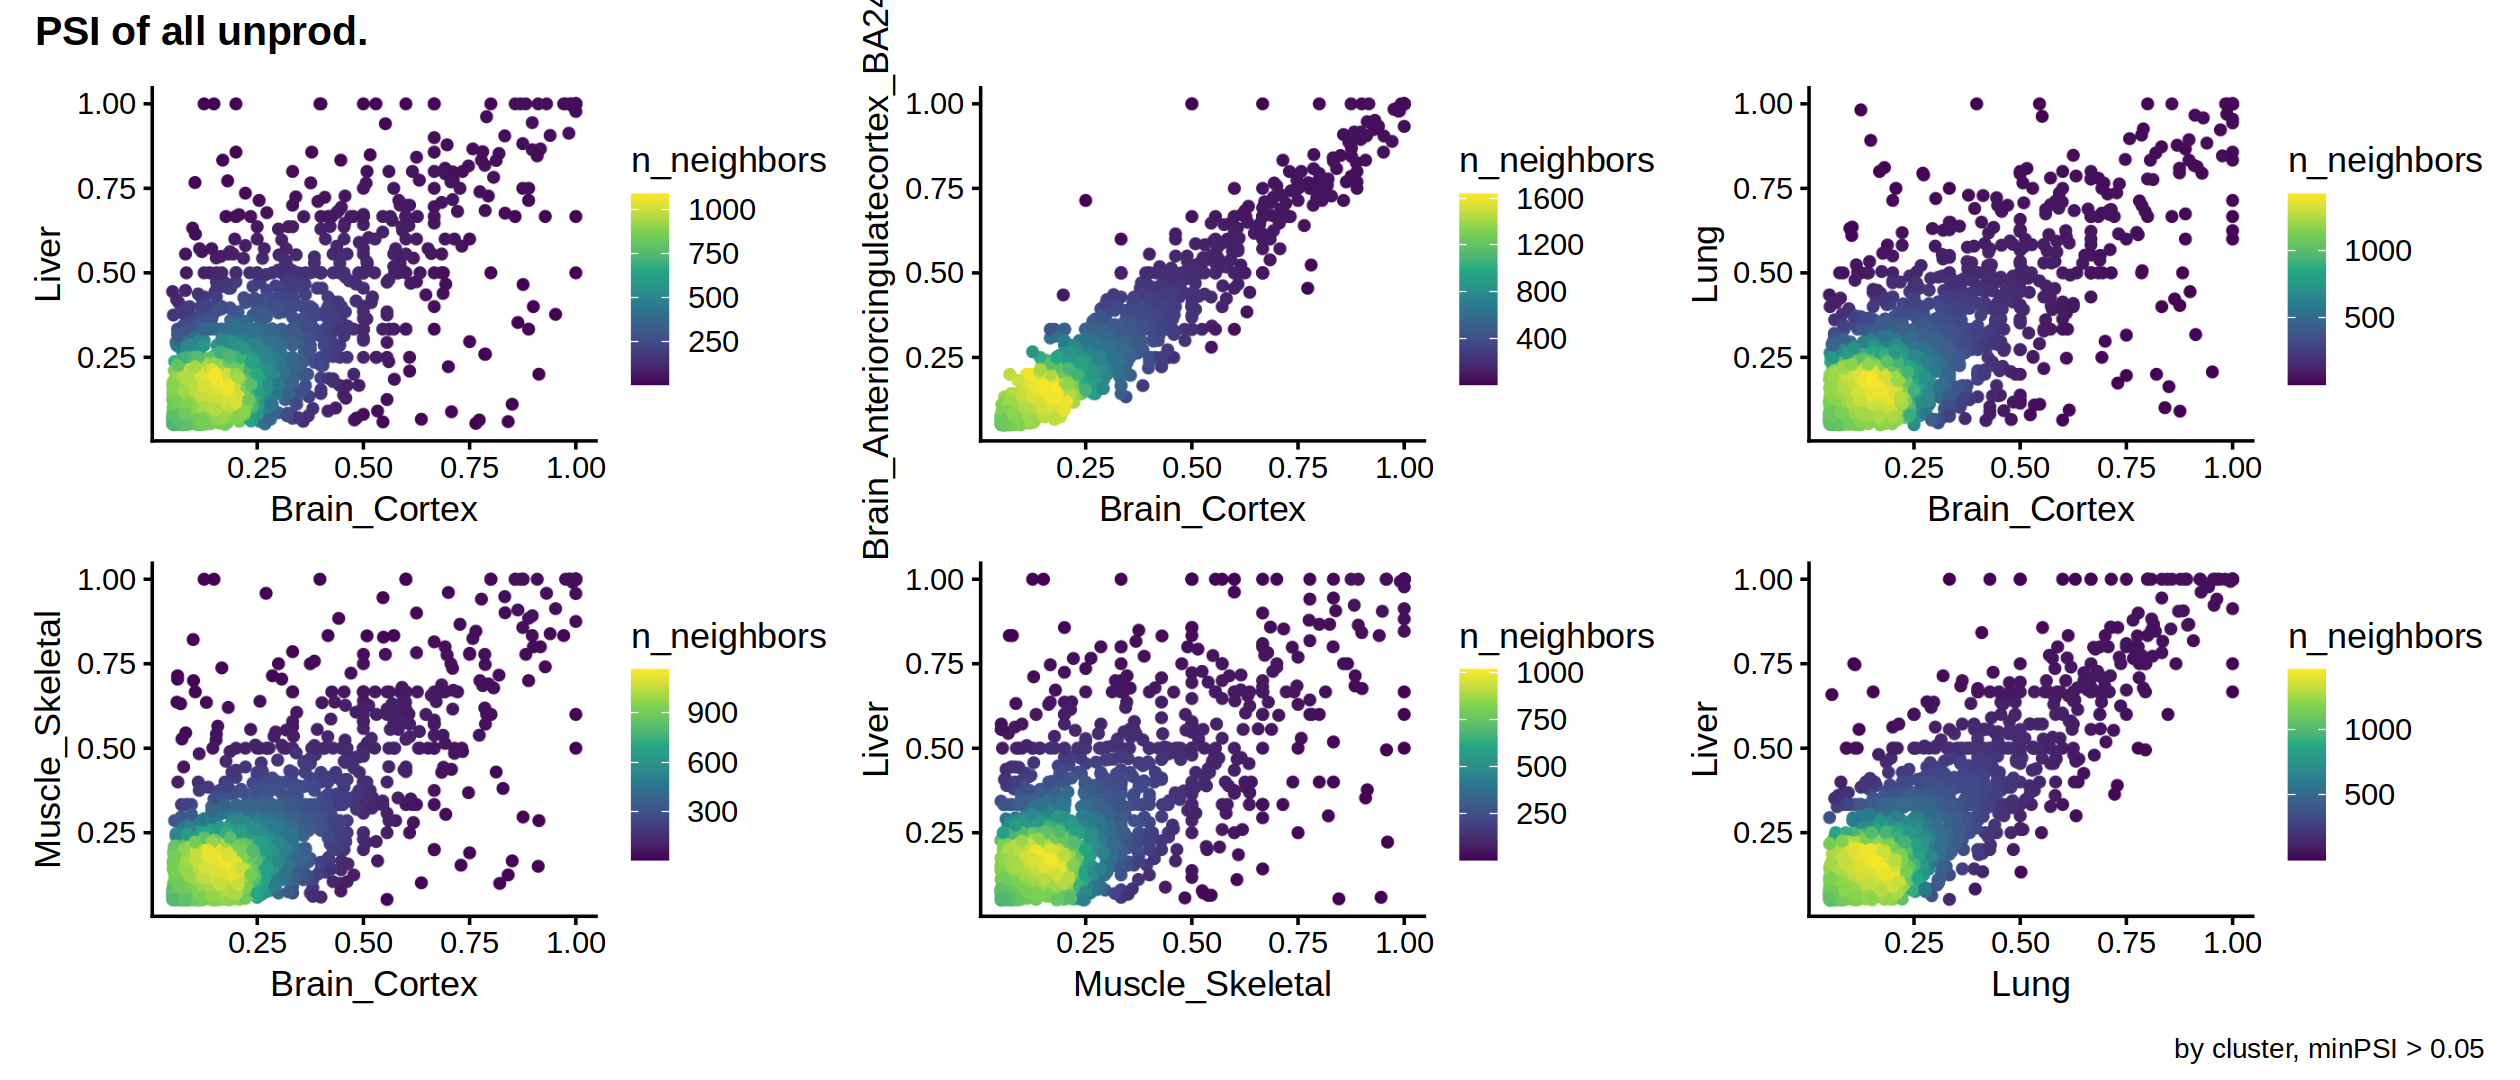

In [265]:
(p1 + p2 + p3)  / (p4 + p5 + p6) + plot_annotation(title = "PSI of all unprod.", caption = "by cluster, minPSI > 0.05")